In [ ]:
import h5py
import matplotlib.pyplot as plt
import os
import numpy as np

images_dir = "./output/"

In [ ]:
""" Option 1 - Shapes of the output """

for i in range(len(os.listdir(images_dir))):
    image = str(i) + ".hdf5"
    print("-"*5, image, "-"*5)
    image_dir = images_dir + image
    with h5py.File(image_dir, 'r') as file:
        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                print(f"Group: {name}")
            elif isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name} - shape: {obj.shape}, dtype: {obj.dtype}")

        # Traverse and print the structure
        file.visititems(print_structure)
    print("\n")

In [ ]:
""" Option 2 - Looking at the contents of the output """

for i in range(len(os.listdir(images_dir))):
    image = str(i) + ".hdf5"
    print("-"*5, image, "-"*5)
    image_dir = images_dir + image
    with h5py.File(image_dir, 'r') as file:
        # View the blender_proc_version
        version = file['blender_proc_version'][()]
        print("BlenderProc Version:", version.decode('utf-8'))

        # View a small section of the colors dataset
        colors = file['colors'][:5, :5] # 5x5 sample
        print("Colors dataset sample (10x10 pixels):\n", colors)

        # View a small section of the depth dataset
        depth = file['depth'][:5, :5]  # 5x5 sample
        print("Depth dataset sample (10x10 pixels):\n", depth)

        # View a small section of the normals dataset
        normals = file['normals'][:5, :5]
        print("Normals dataset sample (10x10 pixels):\n", normals)
    
    print("\n")

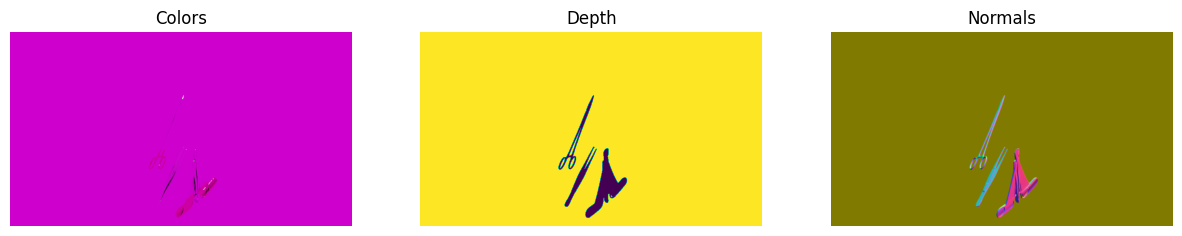

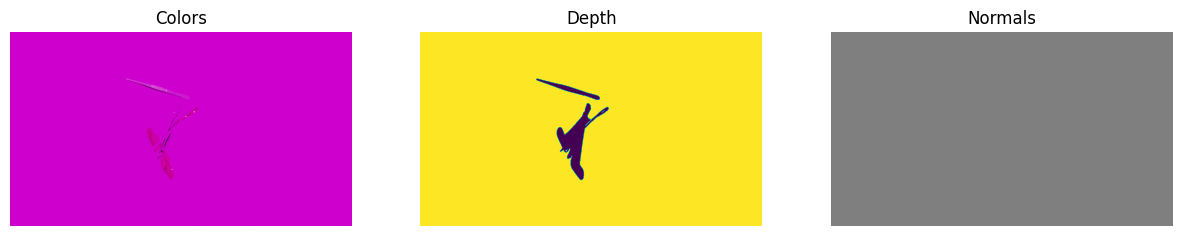

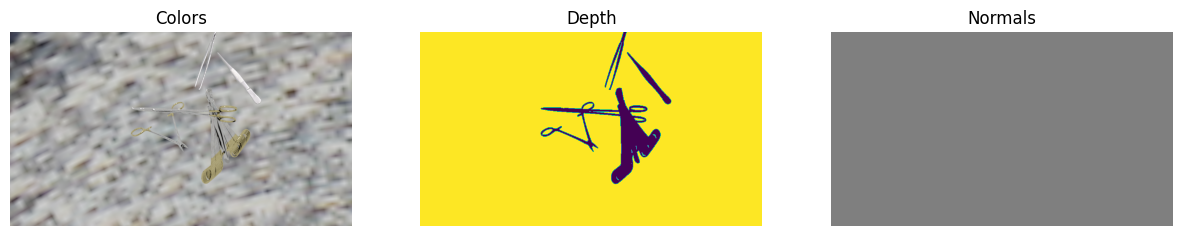

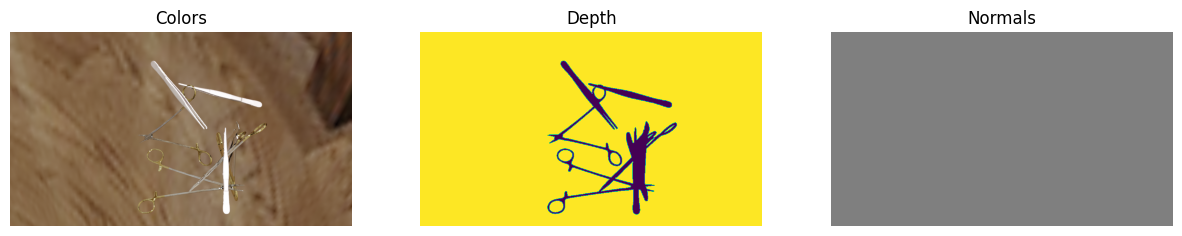

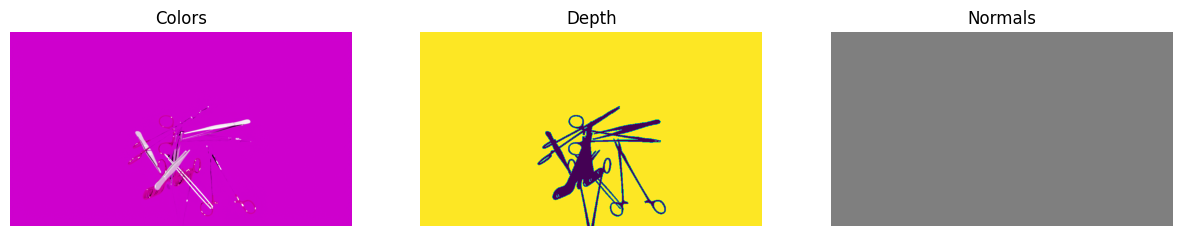

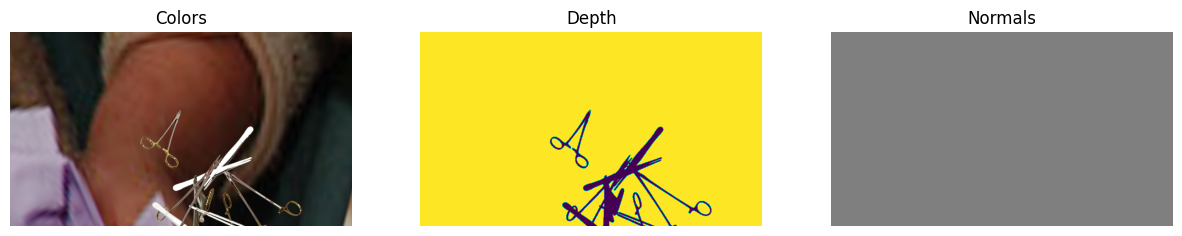

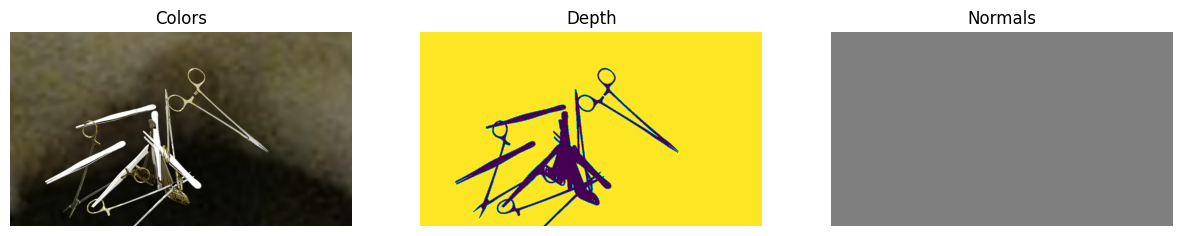

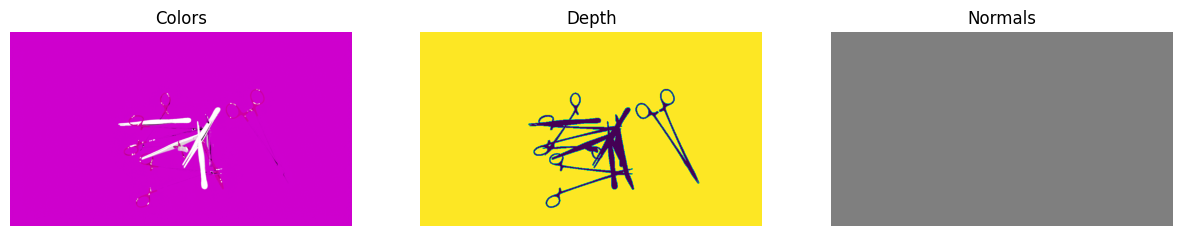

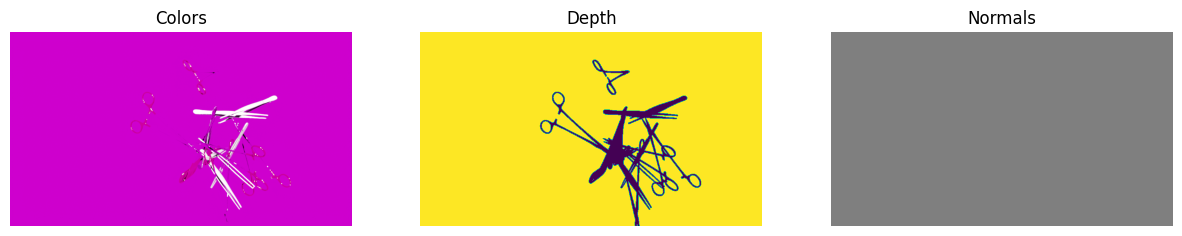

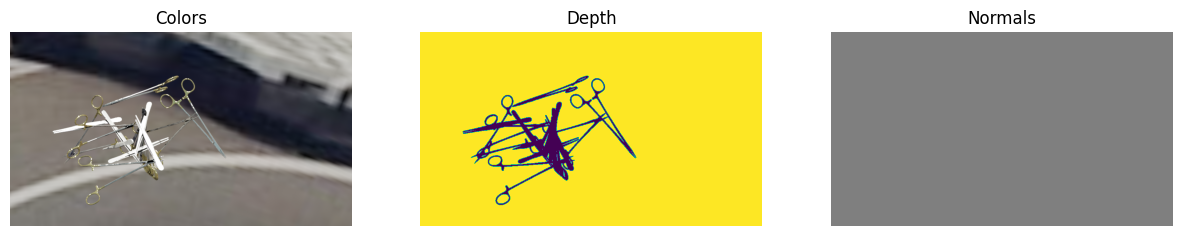

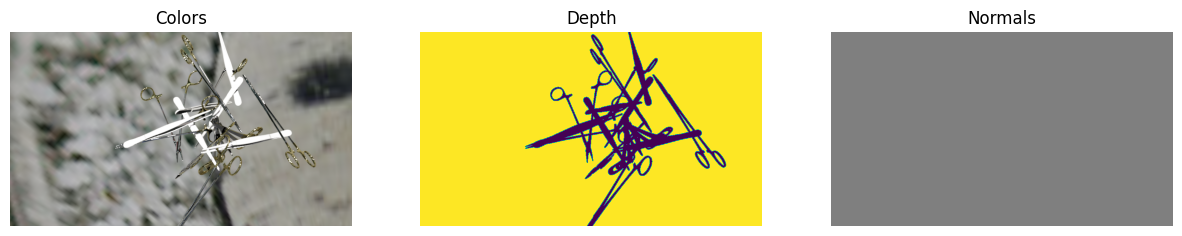

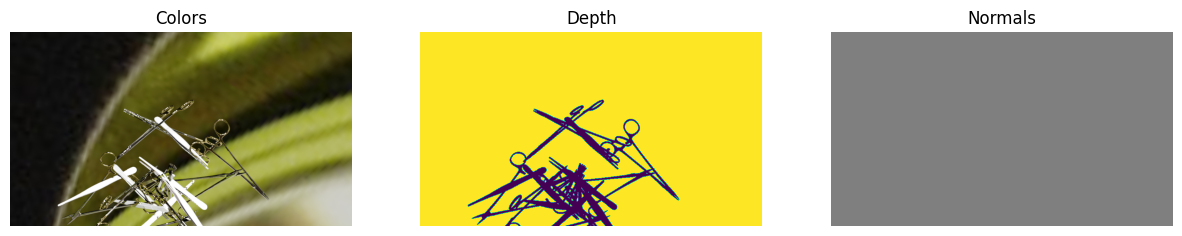

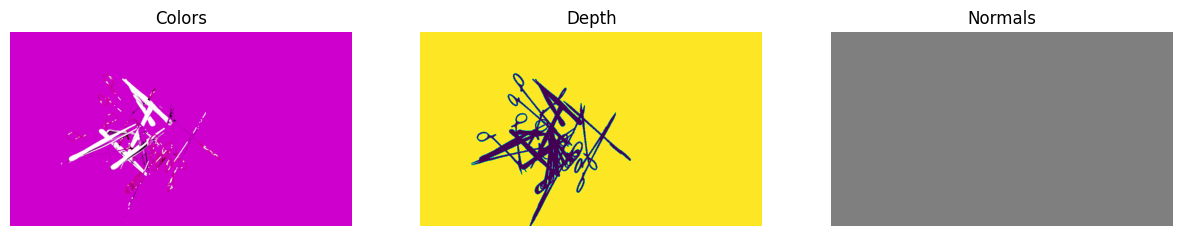

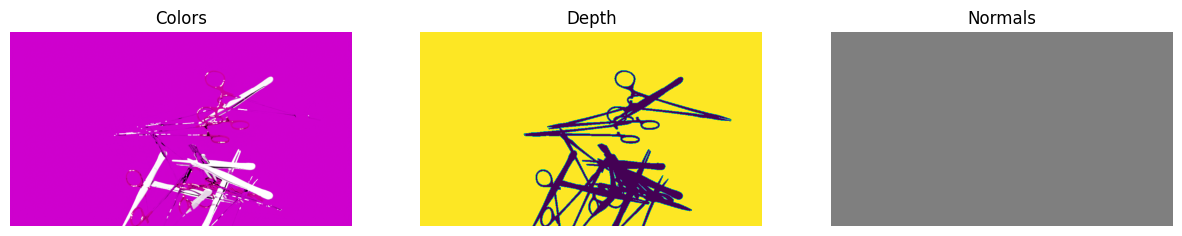

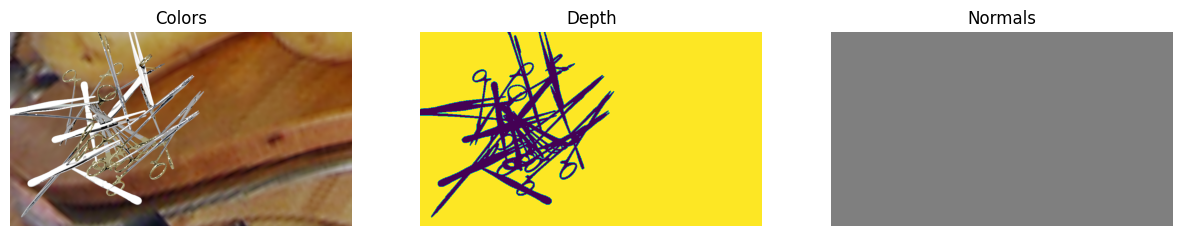

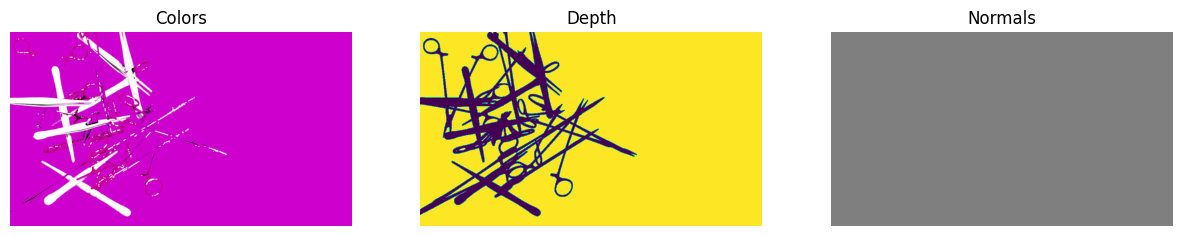

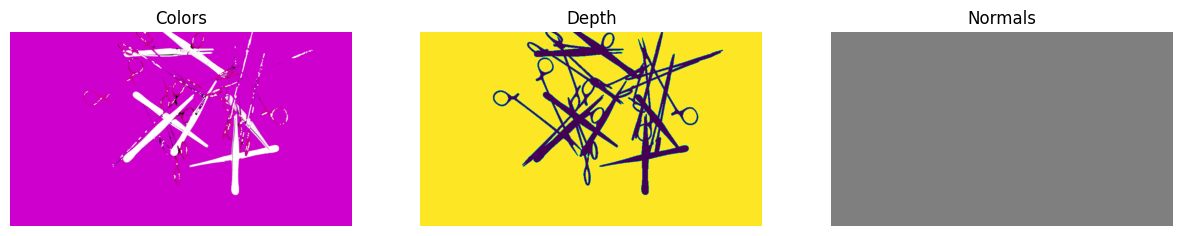

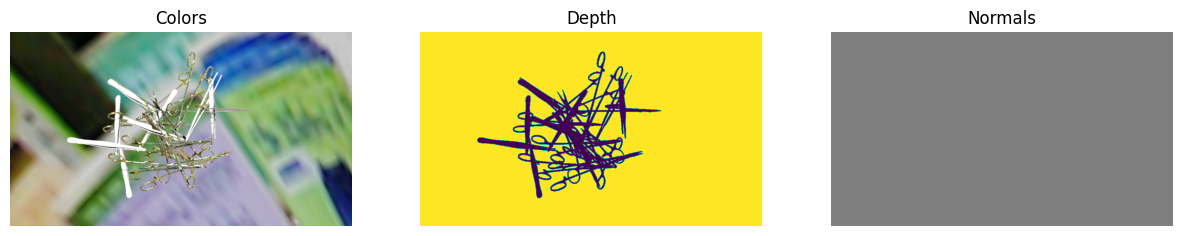

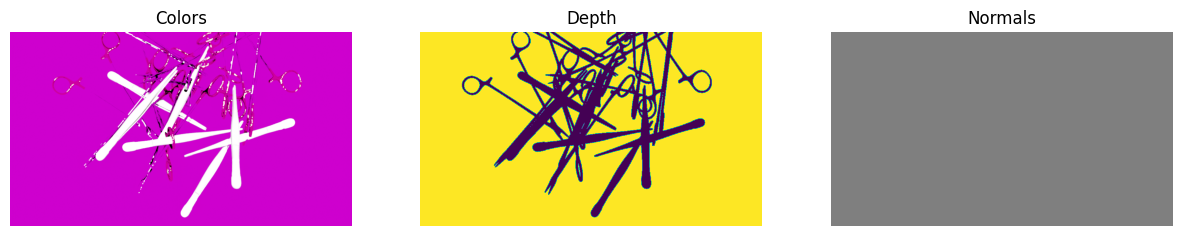

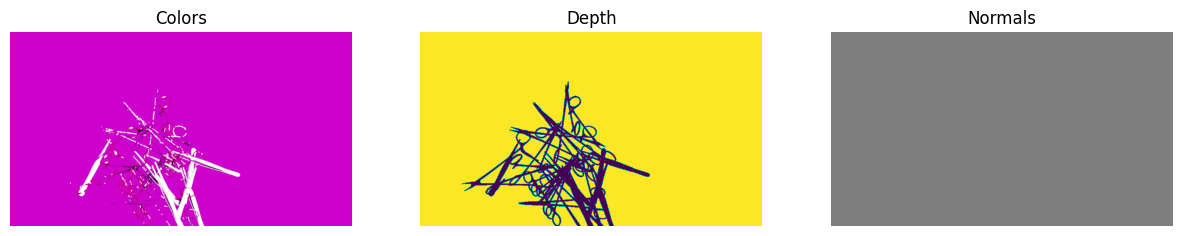

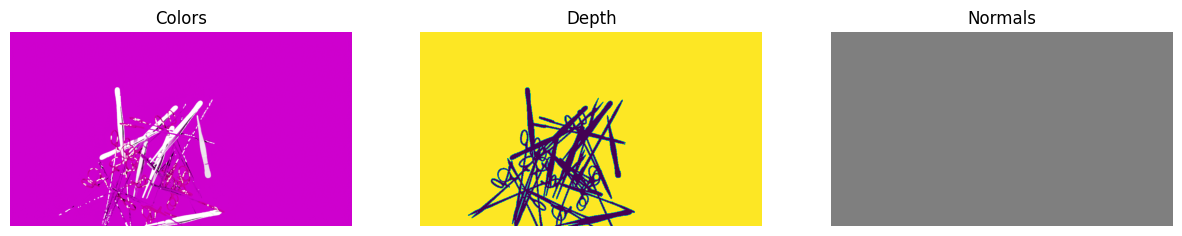

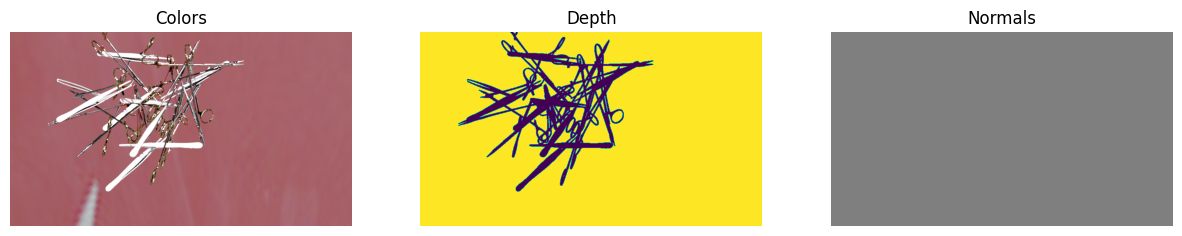

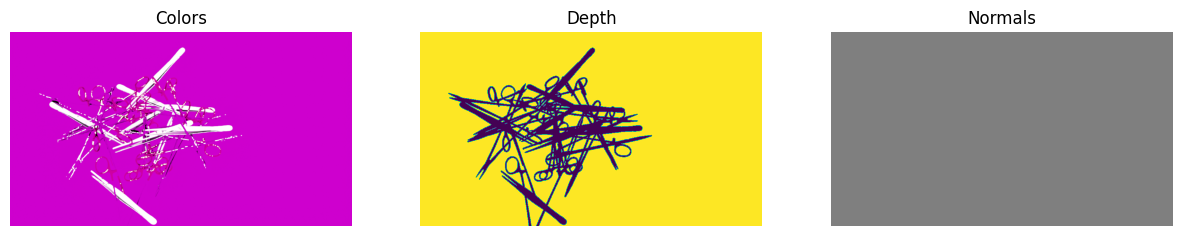

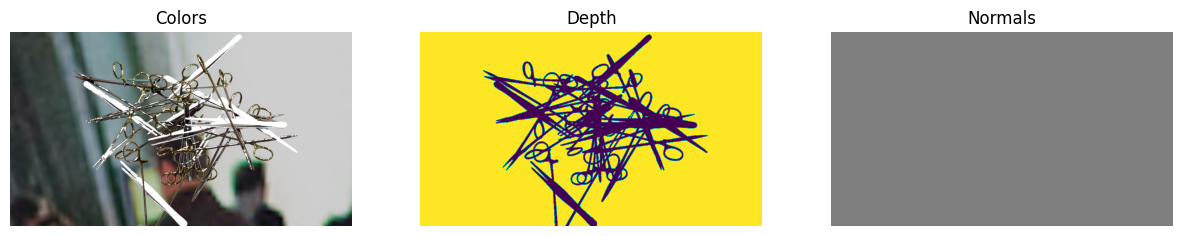

In [ ]:
""" Option 3 - Plot images using matplotlib """

def plot_hdf5(file_name):
    file_path = images_dir + file_name
    # Load the HDF5 file
    with h5py.File(file_path, 'r') as file:
        colors = file['colors'][:]
        depth = file['depth'][:]
        normals = file['normals'][:]

    # Replace NaN values in normals with zeros (or any suitable value)
    normals = np.nan_to_num(normals)

    # Plot the images side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(file_name)

    # Display the color image
    axes[0].imshow(colors)
    axes[0].set_title("Colors")
    axes[0].axis("off")

    # Display the depth image with a yellow-green colormap (viridis)
    depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())
    axes[1].imshow(depth_normalized, cmap='viridis')
    axes[1].set_title("Depth")
    axes[1].axis("off")

    # Display the normals image
    # Normalize each channel independently to [0, 1]
    normals_min = normals.min(axis=(0, 1), keepdims=True)
    normals_max = normals.max(axis=(0, 1), keepdims=True)

    # Check if min and max are the same
    if np.all(normals_max == normals_min):
        normals_normalized = np.ones(normals.shape) * 0.5  # Set a constant value for normalization
    else:
        normals_normalized = (normals - normals_min) / (normals_max - normals_min)

    # Clip to ensure values are within [0, 1]
    normals_normalized = np.clip(normals_normalized, 0, 1)

    axes[2].imshow(normals_normalized)
    axes[2].set_title("Normals")
    axes[2].axis("off")

    plt.show()


for i in range(len(os.listdir(images_dir))):
    image = str(i) + ".hdf5"
    plot_hdf5(image)

./output/synthetic_images/0.hdf5: 
Keys: 'colors': (544, 960, 3), 'depth': (544, 960), 'normals': (544, 960, 3)


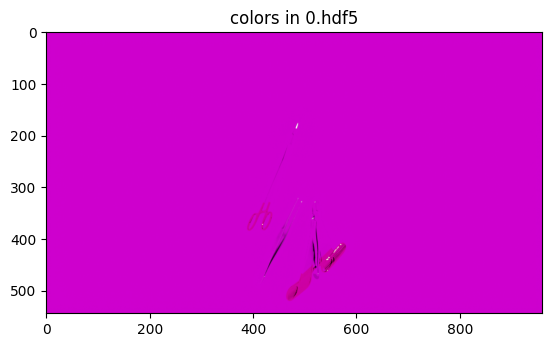

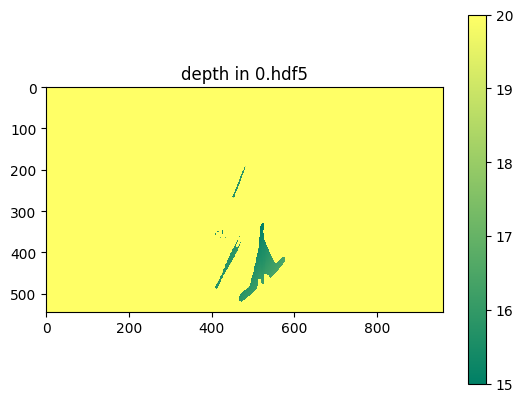

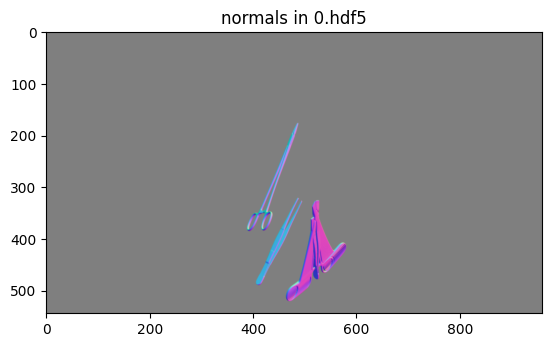

./output/synthetic_images/1.hdf5: 
Keys: 'colors': (544, 960, 3), 'depth': (544, 960), 'normals': (544, 960, 3)


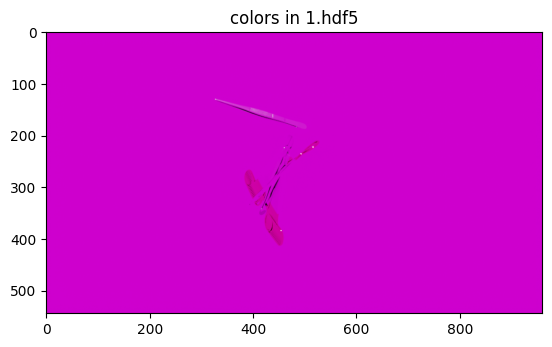

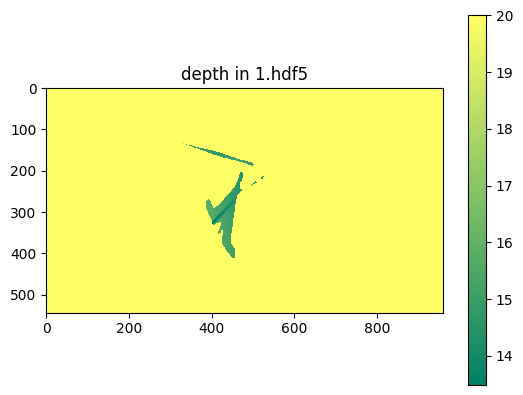

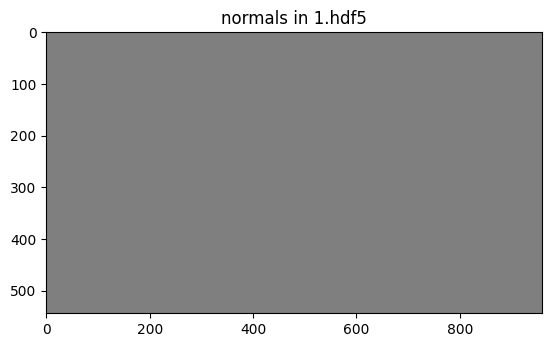

./output/synthetic_images/2.hdf5: 
Keys: 'colors': (544, 960, 3), 'depth': (544, 960), 'normals': (544, 960, 3)


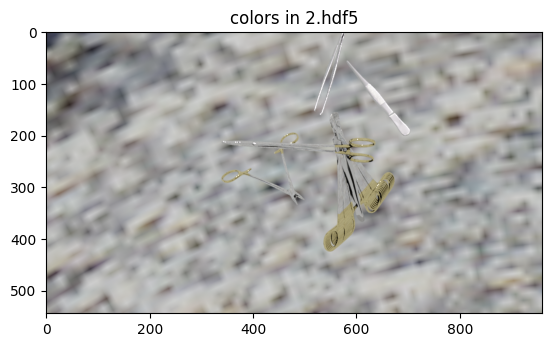

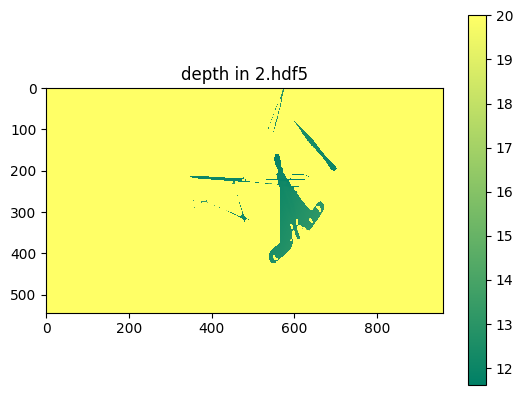

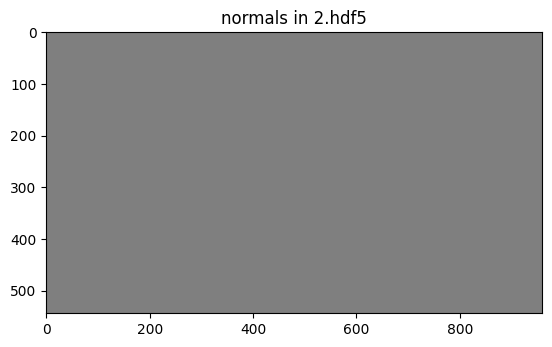

./output/synthetic_images/3.hdf5: 
Keys: 'colors': (544, 960, 3), 'depth': (544, 960), 'normals': (544, 960, 3)


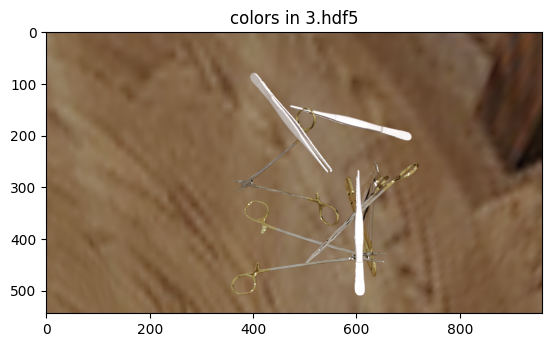

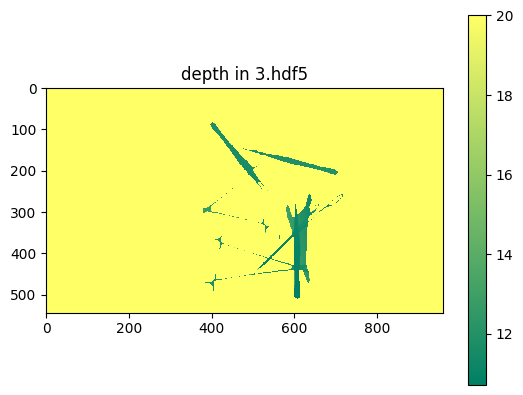

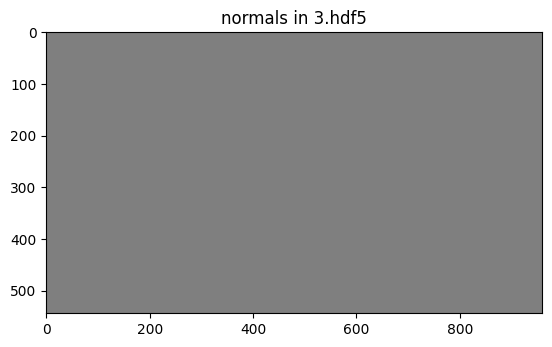

In [ ]:
""" The real content of the hdf5 files """

# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "./output/0.hdf5"
%run "-m" "blenderproc" "vis" "hdf5" "./output/1.hdf5"
%run "-m" "blenderproc" "vis" "hdf5" "./output/2.hdf5"
%run "-m" "blenderproc" "vis" "hdf5" "./output/3.hdf5"